In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
N = 20
X = np.random.random(N)*10 - 5  # uniform random
Y = 0.5 * X - 1 + np.random.randn(N)*(0.7) # normal gaussian

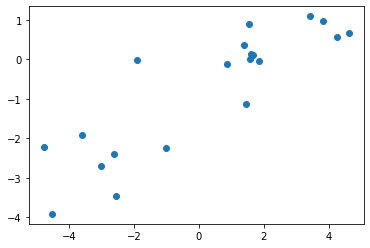

In [13]:
plt.scatter(X,Y);

In [63]:
def create_model(X,Y,N,n_epochs):
    model = nn.Linear(1,1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    X = X.reshape(N,1)
    Y = Y.reshape(N,1)
    # torch 32 default and numpy is 64
    inputs  = torch.from_numpy(X.astype(np.float32))
    targets = torch.from_numpy(Y.astype(np.float32))
    
    
    losses = []
    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        
        print(f"Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}")
        
        
    weights = model.weight.data.numpy()
    return model ,losses , weights

In [64]:
model ,losses , weights = create_model(X,Y,N,30)

Epoch 1/30, Loss: 0.6339
Epoch 2/30, Loss: 0.6029
Epoch 3/30, Loss: 0.5880
Epoch 4/30, Loss: 0.5808
Epoch 5/30, Loss: 0.5772
Epoch 6/30, Loss: 0.5754
Epoch 7/30, Loss: 0.5745
Epoch 8/30, Loss: 0.5740
Epoch 9/30, Loss: 0.5737
Epoch 10/30, Loss: 0.5736
Epoch 11/30, Loss: 0.5735
Epoch 12/30, Loss: 0.5734
Epoch 13/30, Loss: 0.5734
Epoch 14/30, Loss: 0.5734
Epoch 15/30, Loss: 0.5734
Epoch 16/30, Loss: 0.5734
Epoch 17/30, Loss: 0.5734
Epoch 18/30, Loss: 0.5734
Epoch 19/30, Loss: 0.5734
Epoch 20/30, Loss: 0.5734
Epoch 21/30, Loss: 0.5734
Epoch 22/30, Loss: 0.5734
Epoch 23/30, Loss: 0.5734
Epoch 24/30, Loss: 0.5734
Epoch 25/30, Loss: 0.5734
Epoch 26/30, Loss: 0.5734
Epoch 27/30, Loss: 0.5734
Epoch 28/30, Loss: 0.5734
Epoch 29/30, Loss: 0.5734
Epoch 30/30, Loss: 0.5734


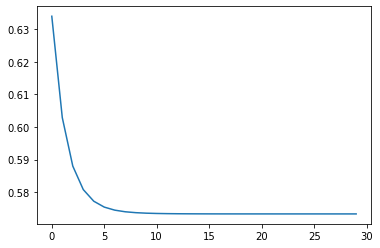

In [65]:
plt.plot(losses);

In [83]:
def plot_line_data(model,X,Y,N,mode=0):
    X = X.reshape(N,1)
    inputs = torch.from_numpy(X.astype(np.float32))
    if mode==0:
        predicted = model(inputs).detach().numpy()
    # try with this : model(inputs).numpy() or model(inputs)
    elif mode==1:
        with torch.no_grad():
            predicted = model(inputs).numpy()
    
    plt.scatter(X,Y,label="Original Data")
    plt.plot(X,predicted,label="Fitted line",color="r")
    plt.legend()
    plt.show()
    
    return predicted

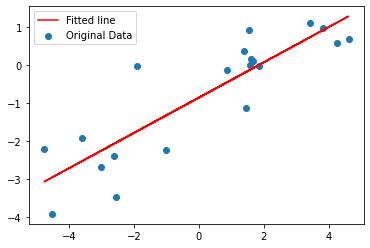

In [87]:
predicted = plot_line_data(model,X,Y,N,1)

In [88]:
predicted

array([[-2.5289319e+00],
       [-6.5135956e-04],
       [ 1.2796206e+00],
       [ 9.1746241e-01],
       [-1.7497370e+00],
       [-2.9628880e+00],
       [ 7.3601955e-01],
       [-2.0708568e+00],
       [-1.1124581e-01],
       [-8.9812458e-02],
       [-1.3355727e+00],
       [-2.0457926e+00],
       [-2.2636189e+00],
       [-1.8518746e-01],
       [-1.2239659e-01],
       [-2.1215439e-01],
       [-3.0692253e+00],
       [-1.4076972e-01],
       [ 1.1149814e+00],
       [-4.6205097e-01]], dtype=float32)

In [98]:
# weight and bias
w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(w,b)
print([0.5],[-1])

[[0.46439603]] [-0.85980004]
[0.5] [-1]


In [91]:
def print_model_parameters(model):
    for param in model.parameters():
        print(param)
    
    print("----------------------------------")
    for name, param in model.named_parameters():
        print(name,param)

In [92]:
print_model_parameters(model)
# list(model.parameters())[0].data.numpy()

Parameter containing:
tensor([[0.4644]], requires_grad=True)
Parameter containing:
tensor([-0.8598], requires_grad=True)
----------------------------------
weight Parameter containing:
tensor([[0.4644]], requires_grad=True)
bias Parameter containing:
tensor([-0.8598], requires_grad=True)


In [99]:
# In order to test the efficiency of our model, synthetic data is useful